In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import itertools

from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KernelDensity
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

from sklearn.decomposition import FastICA
from sklearn.metrics import accuracy_score, log_loss
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('Input/pd_speech_features.csv') 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [3]:
data.head()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [4]:
data.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [5]:
null_values=data.isnull().sum()
null_values=pd.DataFrame(null_values, columns=['null'])
j=1
sum_tot=len(data)
null_values['percent']=null_values['null']/sum_tot
round(null_values*100,3).sort_values('percent', ascending=False)

,null,percent
id,0,0.0
tqwt_medianValue_dec_6,0,0.0
tqwt_TKEO_std_dec_33,0,0.0
tqwt_TKEO_std_dec_34,0,0.0
tqwt_TKEO_std_dec_35,0,0.0
...,...,...
det_LT_entropy_log_2_coef,0,0.0
det_LT_entropy_log_3_coef,0,0.0
det_LT_entropy_log_4_coef,0,0.0
det_LT_entropy_log_5_coef,0,0.0


In [6]:
from sklearn.model_selection import train_test_split
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [7]:
X

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,0.000044,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,0.000003,...,3.4394,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671
752,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,0.000006,...,19.6733,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170
753,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,0.000004,...,137.3126,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424
754,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,0.000005,...,5.4425,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131


In [8]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

### Check for Unbalance Dataset:

/Users/mikhailvorotnikov/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


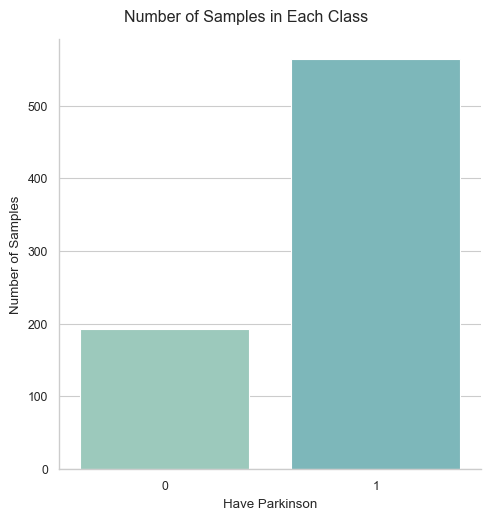

In [9]:
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('GnBu_d')
a = sns.catplot(x='class', data=data, kind='count')
a.fig.suptitle('Number of Samples in Each Class', y=1.03)
a.set(ylabel='Number of Samples', xlabel='Have Parkinson')
plt.show()

In [10]:
from sklearn.dummy import DummyClassifier

# setting up testing and training sets
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# checking unique labels
print('Unique predicted labels: ', (np.unique(dummy_pred)))

# checking accuracy
print('Test score: ', accuracy_score(y_test, dummy_pred))

Unique predicted labels:  [1]
Test score:  0.7566137566137566


In [11]:
# Modeling the data as is
# Train model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)
 
# Predict on training set
lr_pred = lr.predict(X_test)

# Checking accuracy
accuracy_score(y_test, lr_pred)

0.8201058201058201

### Balance Dataset:


1. Resampling Techniques — Oversample minority class:

In [12]:
from sklearn.utils import resample

# Separate input features and target
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)
# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

# separate minority and majority classes
parkinson = X.loc[X['class'] == 1]
not_parkinson = X.loc[X['class'] == 0]


# upsample minority
fraud_upsampled = resample(not_parkinson,
                          replace=True, # sample with replacement
                          n_samples=len(parkinson), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
upsampled = pd.concat([parkinson, fraud_upsampled])
y_train_up = upsampled.loc[:,'class']
X_train_up = upsampled.drop(['class'], axis=1)
min_max_scaler = preprocessing.MinMaxScaler()
X_train_up = min_max_scaler.fit_transform(X_train_up)
X_test = min_max_scaler.transform(X_test)
upsampled['class'].value_counts()


class
1    421
0    421
Name: count, dtype: int64

In [13]:
smote = LogisticRegression(solver='liblinear').fit(X_train_up, y_train_up)

smote_pred = smote.predict(X_test)
print("--------------------------------------------------")
print("||==============================================||")
print("|| Oversample Minority Class Accuracy:=> {:.2f} % ||".format(accuracy_score(y_test, smote_pred)*100))
print("||==============================================||")
print("--------------------------------------------------")

--------------------------------------------------
||==============================================||
|| Oversample Minority Class Accuracy:=> 80.42 % ||
||==============================================||
--------------------------------------------------


2. Generate synthetic samples:


In [14]:
!pip install imblearn


In [15]:
from imblearn.over_sampling import SMOTE
# 
# Separate input features and target
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)

# setting up testing and trainingsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=27)


min_max_scaler = preprocessing.MinMaxScaler()
              
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

sm = SMOTE(sampling_strategy='mirity', random_state=27)
# X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# oversampled_train = pd.concat([pd.DataFrame(y_train_smote, columns=['class']), pd.Datrame(X_train_smote)], axis=1)
# oversampled_train['class'].value_counts()
# oversampled_train oversampled_train


In [16]:
# smote = LogisticRegression(solver='liblinear').fit(X_train_smote, y_train_smote)
# 
smote_pred = smote.predict(X_test)

print("--------------------------------------------------")
print("||==============================================||")
print("|| Oversample Minority Class Accuracy:=> {:.2f} % ||".format(accuracy_score(y_test, smote_pred)*100))
print("||==============================================||")
print("--------------------------------------------------")

--------------------------------------------------
||==============================================||
|| Oversample Minority Class Accuracy:=> 79.89 % ||
||==============================================||
--------------------------------------------------


### Important Modules:

### Confusion Matrix Plotting Code:


In [18]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('01')
    plt.xlabel('01')


## ROC Curve Plotting Code:


In [19]:
def plot_roc_curve(y_test, y_pred):
    # calculate the fpr and tpr for all thresholds of the classification
    fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.figure(figsize=(8, 6))

    # method I: plt
    plt.title('Receiver Operating Characteristic', fontsize=14)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.3f' % roc_auc)
    plt.legend(loc = 'lower right', fontsize=11)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.005, 1])
    plt.ylim([0, 1.005])
    plt.ylabel('True Positive Rate', fontsize=12)
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.grid(color='r', linestyle='--', linewidth=0.2)
    plt.show()


### Choose Final Dataset for our Model:


In [20]:
X_train = X_train_up
y_train = y_train_up

In [21]:
def center(X):
    newX = X - np.mean(X, axis = 0)
    return newX

def standardize(X):
    newX = center(X)/np.std(X, axis = 0)
    return newX

In [22]:
y = data.loc[:,'class']
X = data.drop(['class', 'id'], axis=1)

from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object with a variance with a threshold of 0.5
# thresholder = VarianceThreshold(threshold=.5)

# # Conduct variance thresholding
# X_high_variance = thresholder.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

X = min_max_scaler.transform(X)

plt.style.use('default')
from sklearn.metrics import accuracy_score

### Testing Different Classifiers:


1) Naive Bayes Classifier:


--------------------------------------------------------
||====================================================||
|| Train Accuracy GaussianNB Model :=> 75.66%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy GaussianNB Model :=> 70.39%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - GaussianNB Model :=> 10.67  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 75.39% +- 2.73%  ||
||===================================================

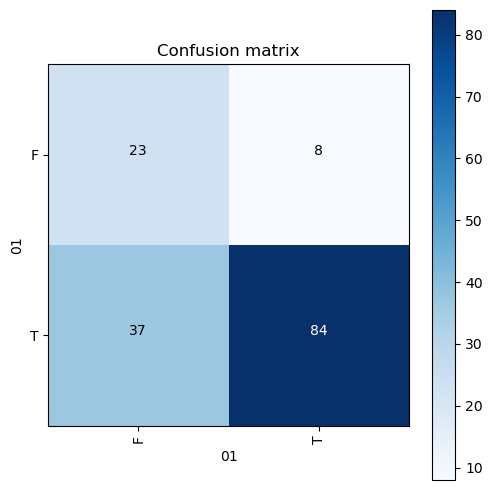

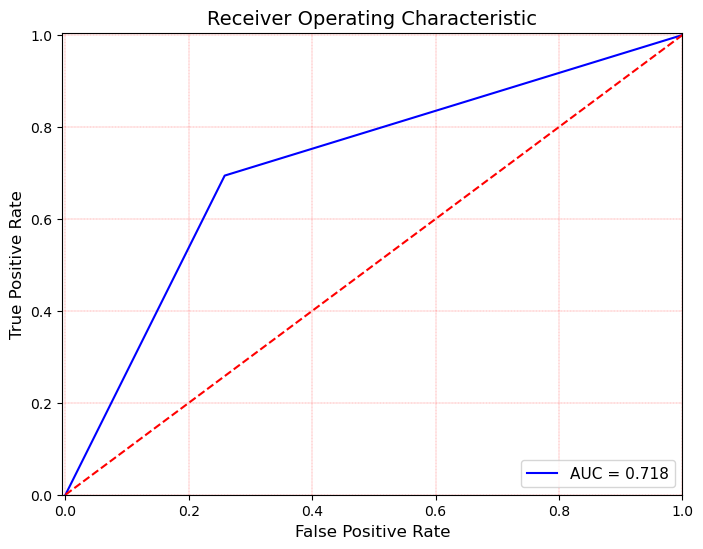

In [23]:
def my_GaussianNB(X_train, y_train, X_test, y_test, X, y):
    clf = GaussianNB()

    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy GaussianNB Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - GaussianNB Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_GaussianNB(X_train, y_train, X_test, y_test, X, y)


## 2) Minimum Distance Classifier:

--------------------------------------------------------
||====================================================||
|| Train Accuracy Minimum Distance Model :=> 72.35%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Minimum Distance Model :=> 73.03%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Minimum Distance Model :=> 9.72  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 71.04% +- 3.63%  ||
||==================================

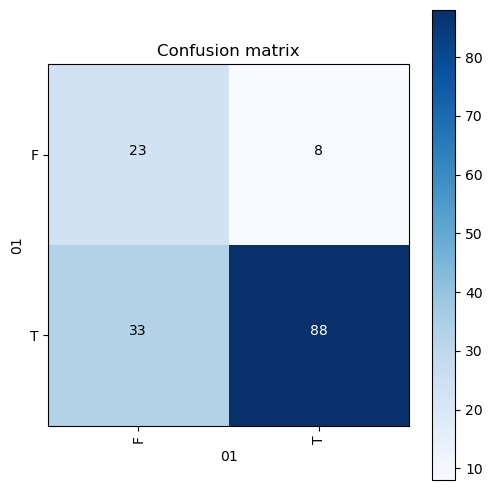

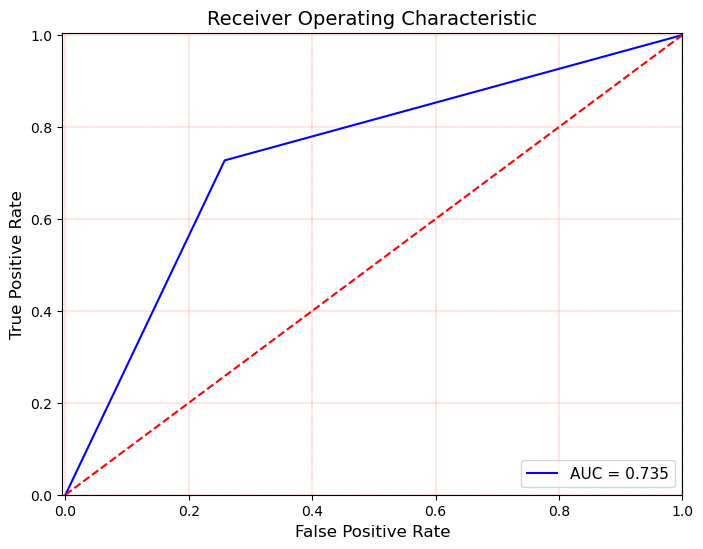

In [24]:
from sklearn.neighbors import NearestCentroid

def my_NearestCentroid(X_train, y_train, X_test, y_test, X, y):
    clf = NearestCentroid(metric='euclidean')
    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy Minimum Distance Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Minimum Distance Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Minimum Distance Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_NearestCentroid(X_train, y_train, X_test, y_test, X, y)

## 3) Logistic Regression:

--------------------------------------------------------
||====================================================||
|| Train Accuracy LogisticRegression Model :=> 93.21%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy LogisticRegression Model :=> 90.13%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - LogisticRegression Model :=> 3.56  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 82.67% +- 4.47%  ||
||============================

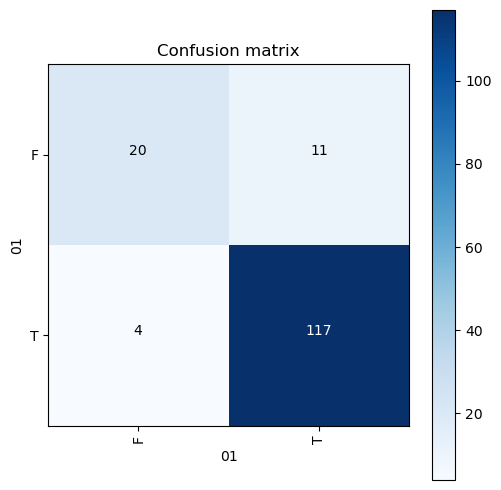

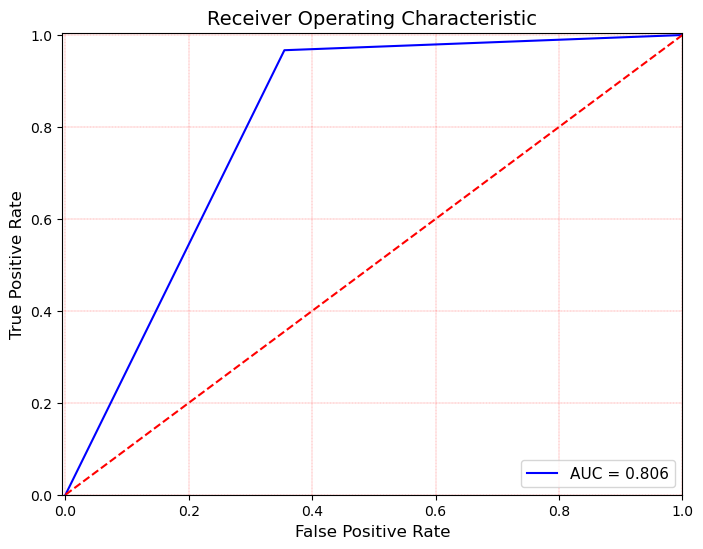

In [25]:
from sklearn.linear_model import LogisticRegression

def my_LogisticRegression(X_train, y_train, X_test, y_test, X, y):
    clf = LogisticRegression(random_state=42, max_iter=1000).fit(X_train, y_train)
    # fitting the classifier
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy LogisticRegression Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - LogisticRegression Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)


my_LogisticRegression(X_train, y_train, X_test, y_test, X, y)


## 4) KNeighbors Classifier:


--------------------------------------------------------
||====================================================||
|| Train Accuracy KNN Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy KNN Model :=> 95.39%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - KNN Model :=> 1.66  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 80.54% +- 3.85%  ||
||====================================================||
-----------------

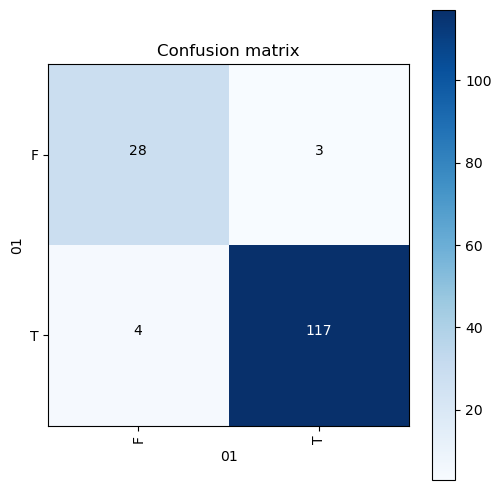

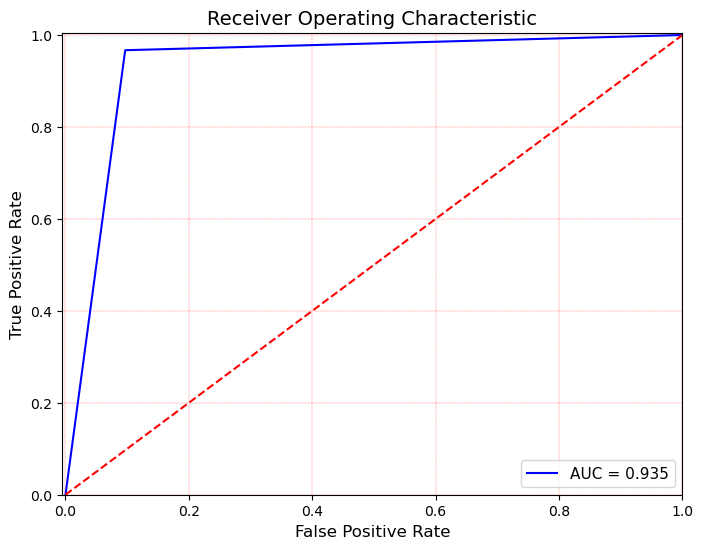

In [26]:
from sklearn.neighbors import KNeighborsClassifier

def my_KNN(X_train, y_train, X_test, y_test, X, y):
    clf = KNeighborsClassifier(n_neighbors=1)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    acc = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    plot_roc_curve(y_test, y_pred)

my_KNN(X_train, y_train, X_test, y_test, X, y)


## 5) MLP Classifier:


              precision    recall  f1-score   support

           0       0.69      0.58      0.63        31
           1       0.90      0.93      0.91       121

    accuracy                           0.86       152
   macro avg       0.79      0.76      0.77       152
weighted avg       0.86      0.86      0.86       152

-------------------------------------------------------------------------------------------------------------
||=========================================================================================================||
|| Train Accuracy [Optimizer:adam - AF:relu - Max Iter:30000 - Early Stop:True - Hidden Layer Size:300]:=> 85.76 % ||
||=========================================================================================================||
-------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------
||===

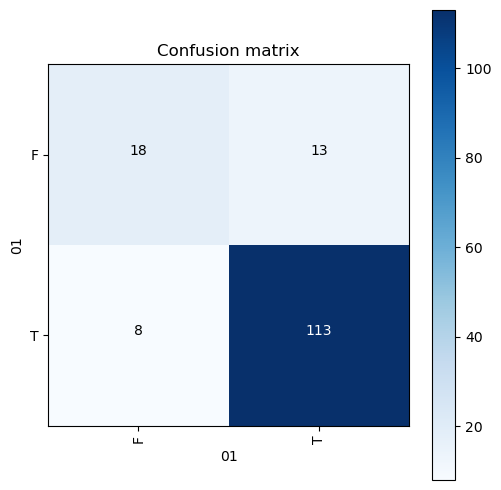

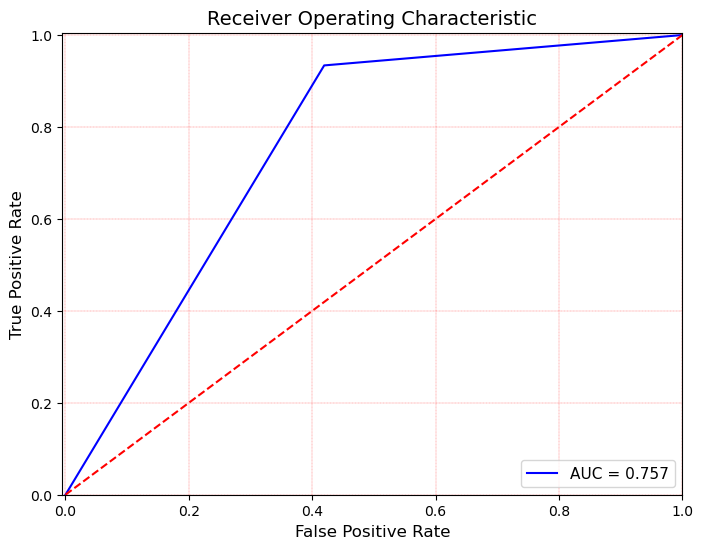

In [27]:
def my_MLP(X_train, y_train, X_test, y_test, X, y):
    hidden_layer_size=300
    max_iteration=30000
    activation_function='relu'
    optimizer='adam'
    early_stopping = True
    ###################################
    mlp_adam = MLPClassifier(hidden_layer_sizes=(hidden_layer_size, 30), max_iter=max_iteration, 
                            activation=activation_function, solver=optimizer, 
                            learning_rate='adaptive', early_stopping=early_stopping)
    mlp_adam.fit(X_train, y_train)

    y_pred = mlp_adam.predict(X_test)

    print("======================================================")
    print(classification_report(y_test, y_pred))
    print("======================================================")

    y_pred_train = mlp_adam.predict(X_train)
    print("-------------------------------------------------------------------------------------------------------------")
    print("||=========================================================================================================||")
    print("|| Train Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_train, y_pred_train)*100
                                                                                )
    , "||")
    print("||=========================================================================================================||")
    print("-------------------------------------------------------------------------------------------------------------")

    print("-------------------------------------------------------------------------------------------------------------")
    print("||=========================================================================================================||")
    print("|| Test Accuracy [Optimizer:{} - AF:{} - Max Iter:{} - Early Stop:{} - Hidden Layer Size:{}]:=> {:.2f} %".format(optimizer, 
                                                                                activation_function, 
                                                                                max_iteration,
                                                                                early_stopping,
                                                                                hidden_layer_size,
                                                                                accuracy_score(y_test, y_pred)*100
                                                                                )
    , "||")
    print("||=========================================================================================================||")
    print("-------------------------------------------------------------------------------------------------------------")

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - MLP Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")

    # acc = cross_val_score(mlp_adam, X, y, cv=5, scoring='accuracy')
    # print("--------------------------------------------------------")
    # print("||====================================================||")
    # print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100,np.std(acc)*100), " ||")
    # print("||====================================================||")
    # print("--------------------------------------------------------")

    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")

    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_MLP(X_train, y_train, X_test, y_test, X, y)


## 6) SVM Classifier:


||============================================================================||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> 84.21 %                ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with linear Kernel, One-vs-One:=> 84.21 %                 ||
|| ---------------------------------------------------------------------------||
|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> 78.95 %                   ||
||----------------------------------------------------------------------------||
|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> 87.50 % ||
||============================================================================||
||----------------------------------------------------------------------------||


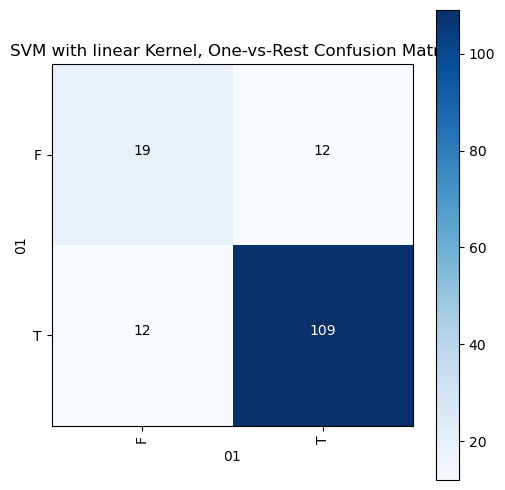

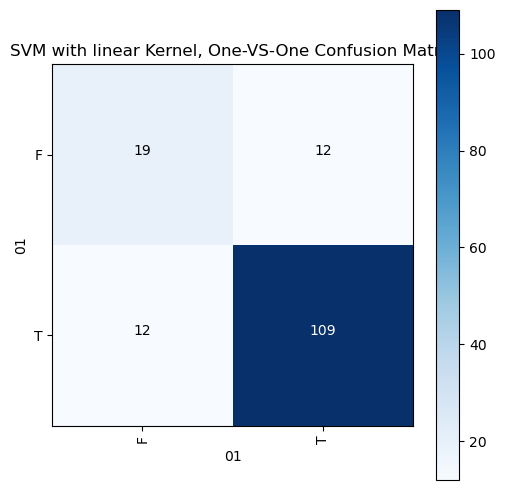

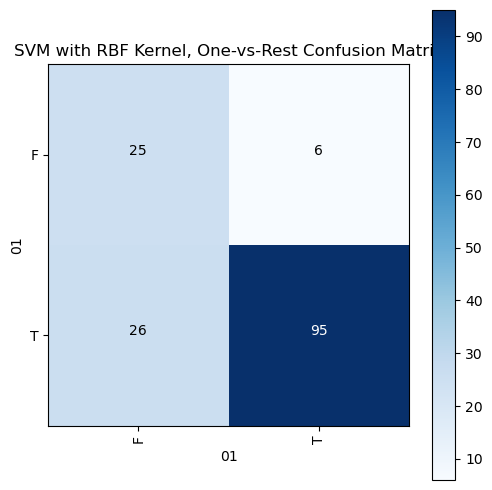

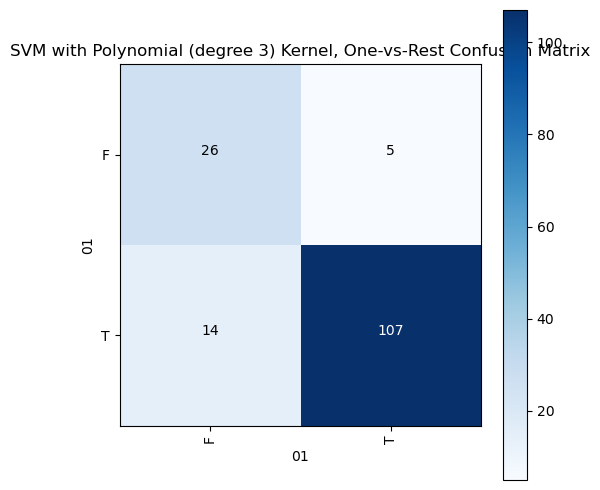

In [28]:
from sklearn import svm

def my_SVM(X_train, y_train, X_test, y_test, X, y):
    X = X_train
    y = y_train

    # class_weight=None
    class_weight='balanced'

    models = (svm.SVC(kernel='linear', decision_function_shape='ovr', class_weight=class_weight),
            svm.SVC(kernel='linear', decision_function_shape='ovo', class_weight=class_weight),
            svm.SVC(kernel='rbf',class_weight=class_weight, decision_function_shape='ovr'),
            svm.SVC(kernel='poly',class_weight=class_weight, degree=3, decision_function_shape='ovr')
            )
    models_fit = (clf.fit(X, y) for clf in models)

    # title for the plots
    titles = ('SVM with linear Kernel, One-vs-Rest',
            'SVM with linear Kernel, One-VS-One',
            'SVM with RBF Kernel, One-vs-Rest',
            'SVM with Polynomial (degree 3) Kernel, One-vs-Rest')



    scores = []
    for clf, title in zip(models_fit, titles):
        scores.append(clf.score(X_test, y_test))


    print("||============================================================================||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with linear Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[0]*100), "               ||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with linear Kernel, One-vs-One:=> {:.2f} %'.format(scores[1]*100), "                ||")
    print("|| ---------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with RBF Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[2]*100), "                  ||")
    print("||----------------------------------------------------------------------------||")
    print('|| Accuracy of SVM with polynomial (degree 3) Kernel, One-vs-Rest:=> {:.2f} %'.format(scores[3]*100), "||")
    print("||============================================================================||")
    print("||----------------------------------------------------------------------------||")

    models_fit_mat = (clf.fit(X, y) for clf in models)

    plt.style.use('default')
    for title, clf in zip(titles, models_fit_mat):
        y_pred = clf.predict(X_test)
        confusion_mtx = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(confusion_mtx, "FT", title=title+" Confusion Matrix")

my_SVM(X_train, y_train, X_test, y_test, X, y)


## 7) Decision Tree Classifier:


--------------------------------------------------------
||====================================================||
|| Train Accuracy Decision Tree Model :=> 100.00%  ||
||====================================================||
--------------------------------------------------------
||====================================================||
|| Test Accuracy Decision Tree Model :=> 82.89%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Decision Tree Model :=> 6.17  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Cross Entropy Accuracy :=> 76.46% +- 2.54%  ||
||==========================================

/Users/mikhailvorotnikov/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/mikhailvorotnikov/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/mikhailvorotnikov/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/Users/mikhailvorotnikov/anaconda3/lib/python3.11/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep

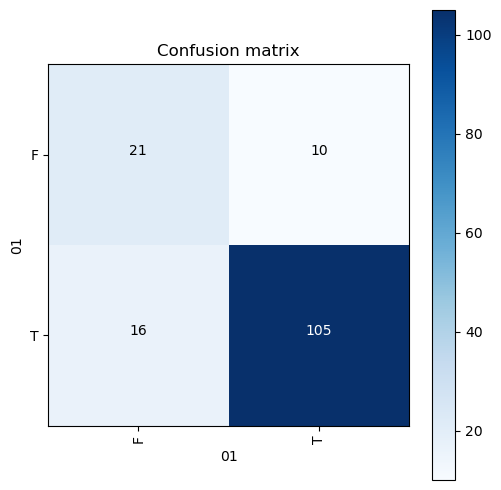

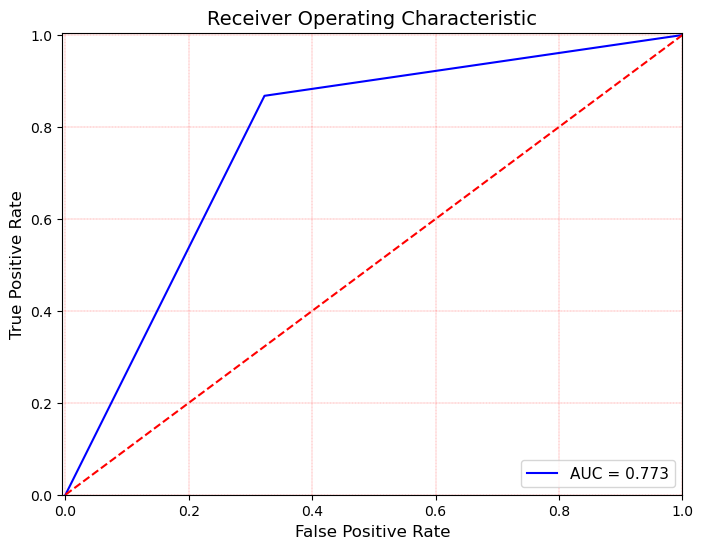

In [33]:
from sklearn import tree

def my_Tree(X_train, y_train, X_test, y_test, X, y):
    clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, min_samples_split=2, 
                                    min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                    max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                    class_weight='balanced', ccp_alpha=0.0)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Decision Tree Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Decision Tree Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_Tree(X_train, y_train, X_test, y_test, X, y)


## 8) RBF Classifier:


In [34]:
def get_distance(x1, x2):
    sum = 0
    for i in range(len(x1)):
        sum += (x1[i] - x2[i]) ** 2
    return np.sqrt(sum)


def kmeans(X, k, max_iters):
  
    centroids = X[np.random.choice(range(len(X)), k, replace=False)]

    converged = False
    
    current_iter = 0

    while (not converged) and (current_iter < max_iters):

        cluster_list = [[] for i in range(len(centroids))]

        for x in X:  # Go through each data point
            distances_list = []
            for c in centroids:
                distances_list.append(get_distance(c, x))
            cluster_list[int(np.argmin(distances_list))].append(x)

        cluster_list = list((filter(None, cluster_list)))

        prev_centroids = centroids.copy()

        centroids = []

        for j in range(len(cluster_list)):
            centroids.append(np.mean(cluster_list[j], axis=0))

        pattern = np.abs(np.sum(prev_centroids) - np.sum(centroids))

        print('K-MEANS: ', int(pattern))

        converged = (pattern == 0)

        current_iter += 1

    return np.array(centroids), [np.std(x) for x in cluster_list]


class RBF:
    def __init__(self, X, y, tX, ty, num_of_classes,
                 k, std_from_clusters=True):
        self.X = X
        self.y = y

        self.tX = tX
        self.ty = ty

        self.number_of_classes = num_of_classes
        self.k = k
        self.std_from_clusters = std_from_clusters

    def convert_to_one_hot(self, x, num_of_classes):
        arr = np.zeros((len(x), num_of_classes))
        for i in range(len(x)):
            x = np.array(x)
            c = int(x[i])
            arr[i][c] = 1
        return arr

    def rbf(self, x, c, s):
        distance = get_distance(x, c)
        return 1 / np.exp(-distance / s ** 2)

    def rbf_list(self, X, centroids, std_list):
        RBF_list = []
        for x in X:
            RBF_list.append([self.rbf(x, c, s) for (c, s) in zip(centroids, std_list)])
        return np.array(RBF_list)


    def fit(self):
        self.centroids, self.std_list = kmeans(self.X, self.k, max_iters=1000)

        if not self.std_from_clusters:
            dMax = np.max([get_distance(c1, c2) for c1 in self.centroids for c2 in self.centroids])
            self.std_list = np.repeat(dMax / np.sqrt(2 * self.k), self.k)

        RBF_X = self.rbf_list(self.X, self.centroids, self.std_list)

        self.w = np.linalg.pinv(RBF_X.T @ RBF_X) @ RBF_X.T @ self.convert_to_one_hot(self.y, self.number_of_classes)

        RBF_list_tst = self.rbf_list(self.tX, self.centroids, self.std_list)

        self.pred_ty = RBF_list_tst @ self.w

        self.pred_ty = np.array([np.argmax(x) for x in self.pred_ty])

        diff = self.pred_ty - self.ty
        print("--------------------------------------------------------")
        print("||====================================================||")
        print('|| Accuracy of RBF Model:=> {:.2f}'.format(len(np.where(diff == 0)[0]) / len(diff)*100), '% ||')
        print("||====================================================||")
        print("--------------------------------------------------------")


RBF_CLASSIFIER = RBF(X_train, y_train, X_test, y_test, num_of_classes=2,
                     k=30, std_from_clusters=False)

RBF_CLASSIFIER.fit()


K-MEANS:  135
K-MEANS:  8
K-MEANS:  13
K-MEANS:  14
K-MEANS:  6
K-MEANS:  0
K-MEANS:  1
K-MEANS:  2
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  2
K-MEANS:  2
K-MEANS:  1
K-MEANS:  1
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
K-MEANS:  0
--------------------------------------------------------
||====================================================||
|| Accuracy of RBF Model:=> 87.50 % ||
||====================================================||
--------------------------------------------------------


# 2- Generative Classifier:


## 1) Parzen Window


In [35]:
from sklearn.neighbors import KernelDensity
model = KernelDensity(kernel='gaussian', bandwidth=1)
model.fit(X_train)
log_dens = model.score_samples(X_test)
log_dens

array([-697.38055761, -699.80921502, -699.25366809, -700.86230885,
       -705.34114759, -698.89843301, -698.34918988, -697.34623099,
       -701.83210483, -698.60076714, -697.30068507, -699.59367891,
       -697.26564383, -697.89213725, -699.64416078, -699.45401736,
       -698.01030607, -699.31565389, -697.32153545, -698.25542118,
       -700.21120901, -703.48456667, -696.66245432, -698.1907896 ,
       -698.20232051, -696.86084919, -698.76970324, -697.16461736,
       -700.76859986, -701.48448969, -700.16629393, -697.82454123,
       -697.1895181 , -697.26730004, -698.58245434, -697.40882936,
       -698.25471881, -699.13281156, -698.34235229, -700.23989634,
       -699.63265336, -698.18434552, -700.51546324, -699.32540574,
       -698.73910798, -699.74259449, -725.4896607 , -697.50815075,
       -700.06965413, -698.1960958 , -697.97738188, -696.92522516,
       -698.21726081, -697.5281041 , -697.78739797, -698.22097003,
       -697.4937401 , -697.09555976, -698.62279407, -702.87118

--------------------------------------------------------
||====================================================||
|| Test Accuracy Parzen Model :=> 87.83%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Parzen Model :=> 4.39  ||
||====================================================||
--------------------------------------------------------
              precision    recall  f1-score   support

           F       0.80      1.00      0.89       152
           T       1.00      0.76      0.86       152

    accuracy                           0.88       304
   macro avg       0.90      0.88      0.88       304
weighted avg       0.90      0.88      0.88       304



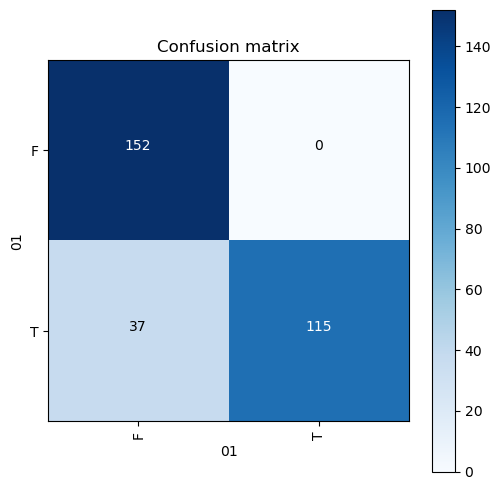

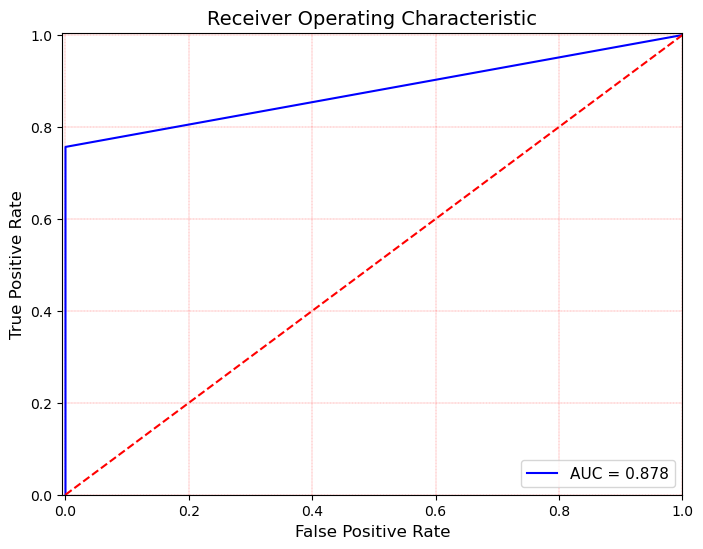

In [36]:
def my_Parzen(X_train, y_train, X_test, y_test, X, y):
    def opt_bayes_parzen(estimators, priors, X_test):
        classes_preds = []
        for estm in range(len(estimators)):
            X_test = np.array(X_test)
            kde = estimators[estm]
            estimation = kde.score_samples(X_test)
            if priors[estm] == 0:
                priors[estm] = 1e-6
            classes_preds.append(estimation + np.log(priors[estm]))
        classes_preds = np.transpose(classes_preds)
        return np.argmax(classes_preds , axis = 1)

    classes = np.unique(y, return_counts=True)[0]
    estimator_list = []
    priors = []
    acc = []
    y_pred = np.array([])
    y_tests = np.array([])
    for cls in range(len(classes)):
        X_train = np.array(X_train)
        one_class = X_train[np.array(y_train).reshape(len(y_train)) == classes[cls]]
        priors.append(0.5) #.append(len(one_class)/len(X))
        kde = KernelDensity(bandwidth=.5, algorithm='auto', kernel='gaussian')
        kde.fit(one_class)
        estimator_list.append(kde)
        # print(priors)
        preds = opt_bayes_parzen(estimators=estimator_list, priors=priors, X_test=X_test)
        labels = np.full(len(preds), cls)
        acc.append(accuracy_score(preds, labels))
        y_pred = np.concatenate((y_pred, preds))
        y_tests = np.concatenate((y_tests, labels))


    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Parzen Model :=> %.2f%%" % (accuracy_score(y_tests, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Parzen Model :=> {:.2f}".format(log_loss(y_tests, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_tests, y_pred)
    print(classification_report(y_tests, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_tests, y_pred)

my_Parzen(X_train, y_train, X_test, y_test, X, y)

### 2) KNN:


--------------------------------------------------------
||====================================================||
|| Test Accuracy Generative KNN Model :=> 95.39%  ||
||====================================================||
--------------------------------------------------------
--------------------------------------------------------
||====================================================||
|| Binary Cross Entropy - Generative KNN Model :=> 1.66  ||
||====================================================||
--------------------------------------------------------
              precision    recall  f1-score   support

           F       0.88      0.90      0.89        31
           T       0.97      0.97      0.97       121

    accuracy                           0.95       152
   macro avg       0.93      0.94      0.93       152
weighted avg       0.95      0.95      0.95       152



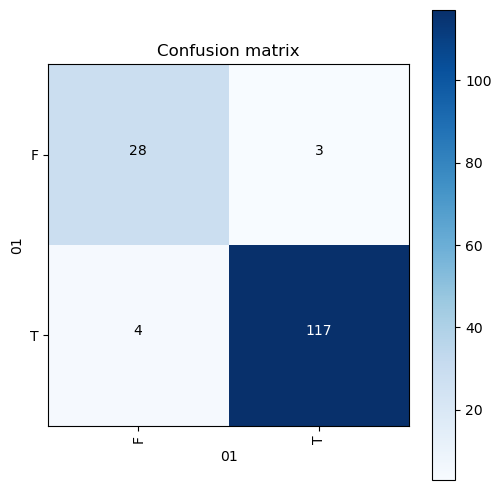

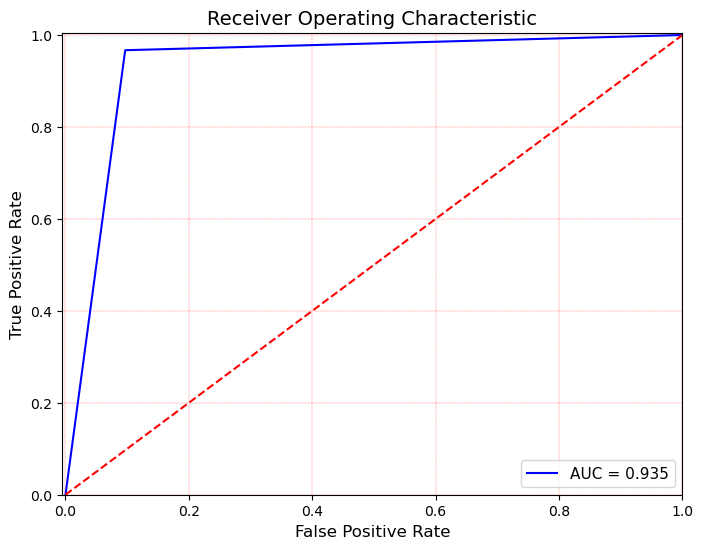

In [37]:
def my_generative_KNN(X_train, y_train, X_test, y_test, X, y):
    def opt_bayes_knn(estimators, priors, X_test):
            classes_preds = []
            proba = estimators.predict_proba(X_test)
            for i in range(len(proba)):
                for j in range(len(proba[i])):
                    if proba[i][j] == 0:
                        proba[i][j] = 1e-6
            for item in range(len(proba[0])):
                if priors[item] == 0:
                    priors[item] = 1e-6
                classes_preds.append(np.log(proba[: , item]) + np.log(priors[item])) 
            classes_preds = np.transpose(classes_preds)
            return np.argmax(classes_preds , axis = 1)

    priors = []
    classes = np.unique(y, return_counts=True)[0]
    one_class1 = X_train[np.array(y_train).reshape(len(y_train)) == classes[0]]
    priors.append(len(one_class1)/len(X_train))
    one_class2 = X_train[np.array(y_train).reshape(len(y_train)) == classes[1]]
    priors.append(len(one_class2)/len(X_train))
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(X_train, y_train)
    priors = [0.5, 0.5]
    y_pred = opt_bayes_knn(estimators=knn, priors=priors, X_test=X_test)

    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy Generative KNN Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - Generative KNN Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_generative_KNN(X_train, y_train, X_test, y_test, X, y)


### 3) GMM:


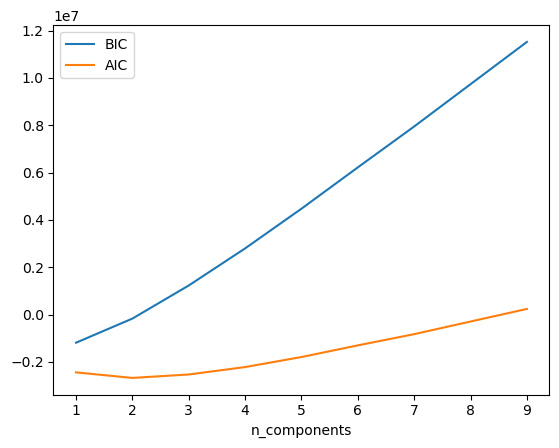

In [38]:
from sklearn.mixture import GaussianMixture
n_components = np.arange(1, 10)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X_train)
          for n in n_components]
plt.style.use('default')
plt.plot(n_components, [m.bic(X_train) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X_train) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');


In [40]:
from sklearn.mixture import GaussianMixture

def my_GMM(X_train, y_train, X_test, y_test, X, y):
    GMM = GaussianMixture(n_components=2, covariance_type='full', random_state=0)
    GMM.fit(X_train) # Instantiate and fit the model
    print('Converged:', GMM.converged_)
    y_pred = GMM.predict(X_test)
    y_pred_train = GMM.predict(X_train)
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Train Accuracy GMM Model :=> %.2f%%" % (accuracy_score(y_train, y_pred_train)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Test Accuracy GMM Model :=> %.2f%%" % (accuracy_score(y_test, y_pred)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Binary Cross Entropy - GMM Model :=> {:.2f}".format(log_loss(y_test, y_pred)), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    acc = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    print("--------------------------------------------------------")
    print("||====================================================||")
    print("|| Cross Entropy Accuracy :=> %.2f%% +- %.2f%%" %(np.mean(acc)*100, np.std(acc)*100), " ||")
    print("||====================================================||")
    print("--------------------------------------------------------")
    confusion_mtx = confusion_matrix(y_test, y_pred)
    print(classification_report(y_test, y_pred, target_names="FT"))
    plot_confusion_matrix(confusion_mtx, "FT")
    # method I: plt
    plot_roc_curve(y_test, y_pred)

my_GMM(X_train, y_train, X_test, y_test, X, y)

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (/Users/mikhailvorotnikov/anaconda3/lib/python3.11/site-packages/sklearn/metrics/__init__.py)